In [3]:
# Default libraries, packages for data management, visualization and Computer vision libraries
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# Tensorflow Packages
from tensorflow.keras.preprocessing import image

2024-07-28 15:59:29.283998: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-28 15:59:29.284073: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-28 15:59:29.285836: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [1]:
model_path = "/kaggle/input/model_final/keras/default/1/OCR_final_model.h5"

In [5]:
# Memuat model tanpa compile
model = tf.keras.models.load_model(model_path, compile=False)

# Kompilasi ulang model
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['categorical_accuracy']
)

# Verifikasi model dengan menampilkan ringkasan model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       160,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         3,636 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 182,552 (713.09 KB)

 Trainable params: 182,552 (713.09 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The predicted character is: 1


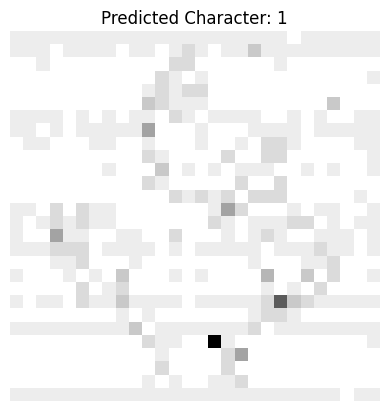

In [9]:
# Define the mapping from class indices to characters
class_indices_to_characters = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J',
    20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T',
    30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z'
}

# Load the image
img_path = '/kaggle/input/test-a/1.jpg'  # Ganti dengan path ke gambar baru Anda
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')

# Convert the image to array
img_array = image.img_to_array(img)

# Normalize the image
img_array = img_array / 255.0

# Reshape the image
img_array = np.reshape(img_array, (1, 28, 28, 1))

# Predict the class of the image
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]

# Convert the predicted class index to the corresponding character
predicted_character = class_indices_to_characters[predicted_class]

# Print the predicted character
print(f'The predicted character is: {predicted_character}')

# Display the image
plt.imshow(img_array[0].reshape(28, 28), cmap='gray')
plt.title(f'Predicted Character: {predicted_character}')
plt.axis('off')
plt.show()
